In [48]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from os.path import join as pjoin

import matplotlib.pyplot as plt
import cv2 as cv
# from skimage.io import imshow, imread, imsave

import warnings
warnings.filterwarnings('ignore')


## train model

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

from sklearn.linear_model import LogisticRegression
from sklearn import svm

from keras.utils.np_utils import to_categorical

# import pickle

In [50]:
mouth_data = pd.read_csv('../01_dataset_GENKI_4K/face_mouth_data.csv')
mouth_tag = pd.read_csv('../01_dataset_GENKI_4K/face_mouth_data_index.csv')[['is_smile']]

WIDTH, HEIGHT = 48, 28 # all mouth images will be resized to the same size
dim = WIDTH * HEIGHT # dimension of feature vector

In [51]:
data_labels = to_categorical(mouth_tag.is_smile.values, num_classes=2)

mouth_data.set_index(['Unnamed: 0'], inplace=True)
mouth_data_norm = mouth_data.values / 255
# data_imgs = mouth_data_norm.reshape(-1, HEIGHT, WIDTH, 1)
data_imgs = mouth_data_norm


In [85]:
X_train, X_val, Y_train, Y_val = train_test_split(data_imgs, mouth_tag, test_size=0.3)

In [86]:
# Logistic Regession
logistic_model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', verbose=1).fit(X_train, Y_train)
accuracy_score(y_true=Y_val, y_pred=logistic_model.predict(X_val))

# joblib.dump(logistic_model, './logistic.joblib') 
# logistic_model.predict(X_val)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


0.8655635987590486

In [55]:
accuracy_score(y_true=Y_val, y_pred=logistic_model.predict(X_val))

0.8841778697001034

In [99]:
# SVM classification
svm_model = svm.SVC(kernel='sigmoid', degree=3, tol=1e-6, verbose=True).fit(X_train, Y_train)
# svm_model = svm.LinearSVC(multi_class='ovr', penalty='l2', tol=1e-6, verbose=1).fit(X_train, Y_train)

accuracy_score(y_true=Y_val, y_pred=svm_model.predict(X_val))



[LibSVM]

0.8314374353671148

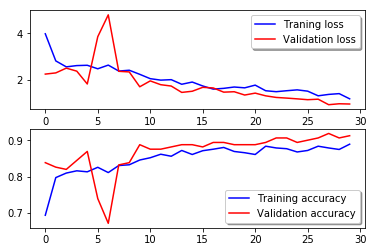

In [302]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Traning loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation loss', axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label='Training accuracy')
ax[1].plot(history.history['val_acc'], color='r', label='Validation accuracy')
legend = ax[1].legend(loc='best', shadow=True)
fig.show()

In [306]:
model.save('model_by_nn_48-28.h5')

## other approches attemps

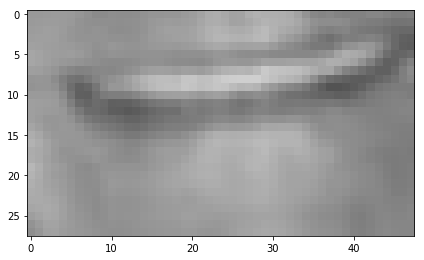

In [292]:
index = 800
t = data_img_vec[index].copy()
t.shape
imshow(t.reshape(HEIGHT, WIDTH))

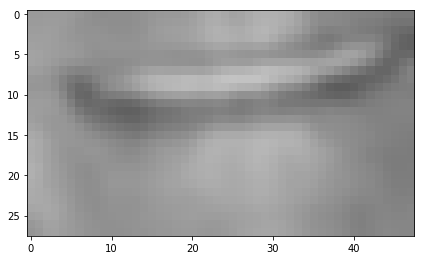

In [293]:
im_t = t.reshape(HEIGHT, WIDTH)
img = cv.GaussianBlur(im_t,(3,3),0)
imshow(img)

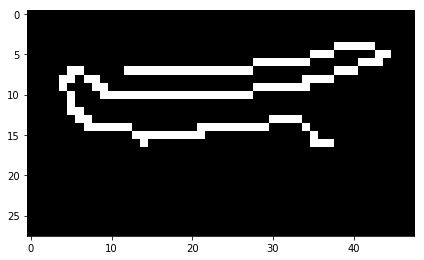

In [294]:
imshow(cv.Canny(img, 50, 150))

In [269]:
t.shape

(1344,)

In [132]:
t_vec = normalize(t.reshape(10, 28), norm='l2', axis=1).reshape(-1,10,28,1)

In [134]:
t_vec.shape

(1, 10, 28, 1)

In [107]:
result = model.predict(t_vec)

In [108]:
result[0][1]

0.9808818

In [155]:
Image.open('./mouths/smile/mouth0002.jpg')

In [182]:
Image.open('./mouths/smile/mouth0002.jpg').resize((48, 28), Image.ANTIALIAS) # resize image

In [153]:
Image.fromarray(t.reshape(20,20))

ValueError: cannot reshape array of size 280 into shape (20,20)